In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='magma')
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('dataset - fix.csv')
dataset.head()

,class,name,age,english_score,school_grade,class_level,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Diligent,nauffal,17,15,3,8,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
1,Diligent,bunga,25,14,4,8,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1
2,Diligent,fiqri,24,14,4,8,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1
3,Diligent,puja,18,14,3,8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,Tolerance,adela,10,1,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
df = dataset[['name', 'class', 'age', 'english_score', 'school_grade','class_level']]

# Data Exploration

In [4]:
print(df.describe().round(3))

          age  english_score  school_grade  class_level
count  60.000         60.000        60.000       60.000
mean   12.917          5.733         1.667        3.683
std     3.885          4.092         1.020        2.182
min     9.000          0.000         1.000        1.000
25%    10.000          2.750         1.000        2.000
50%    12.000          5.000         1.000        3.000
75%    14.000          7.250         2.000        5.000
max    25.000         15.000         4.000        8.000


In [5]:
order_list = ['Enthusiastic',
         'Honesty',
         'Tolerance',
         'Creativity',
         'Responsible',
         'Integrity',
         'Empathy',
         'Diligent']

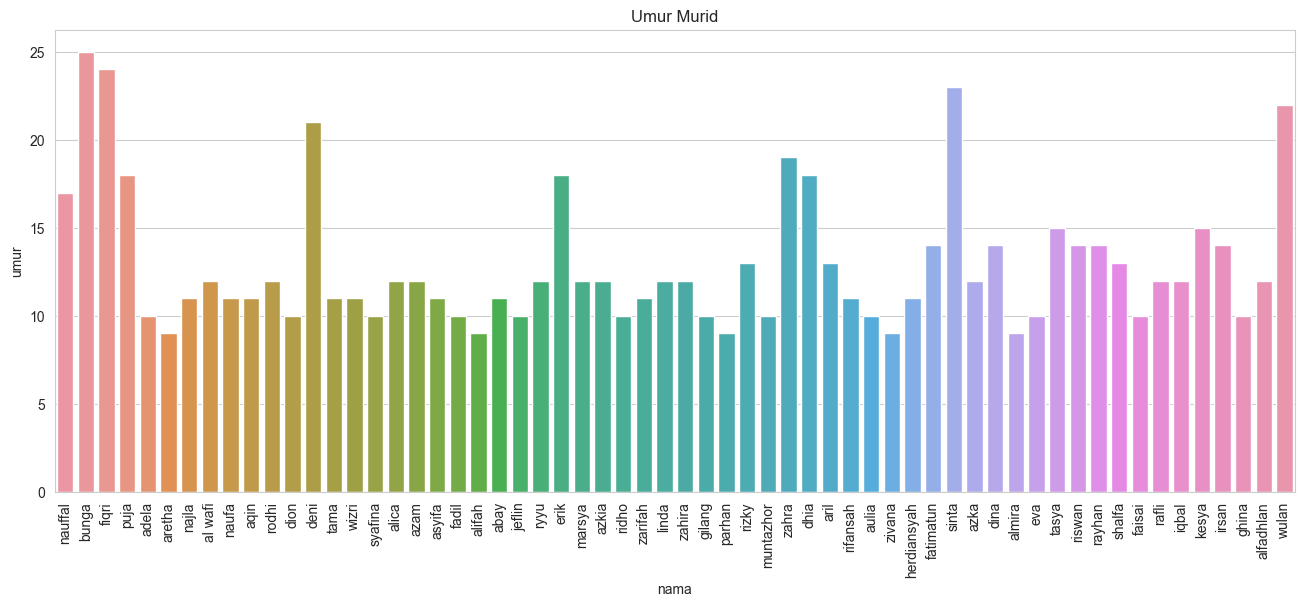

In [6]:
plt.figure(figsize=(16,6))
sns.barplot(data=df, x='name', y='age')
plt.title('Umur Murid')
plt.ylabel('umur')
plt.xlabel('nama')
plt.xticks(rotation=90)
plt.show()

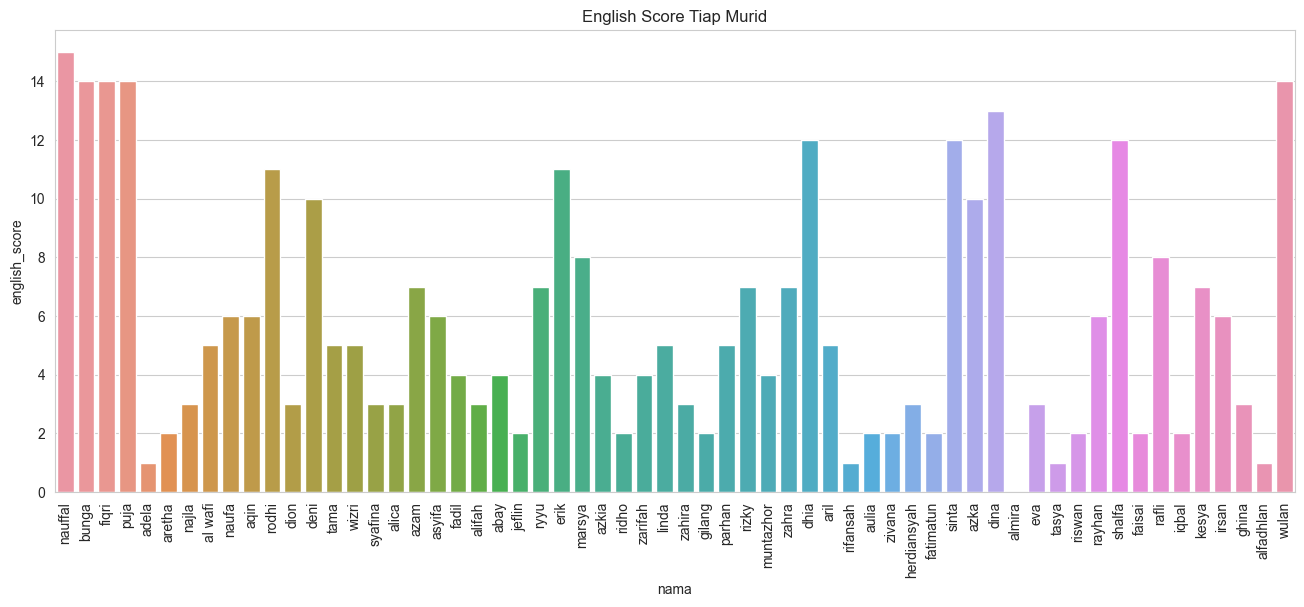

In [7]:
plt.figure(figsize=(16,6))
sns.barplot(data=df, x='name', y='english_score')
plt.title('English Score Tiap Murid')
plt.ylabel('english_score')
plt.xlabel('nama')
plt.xticks(rotation=90)
plt.show()

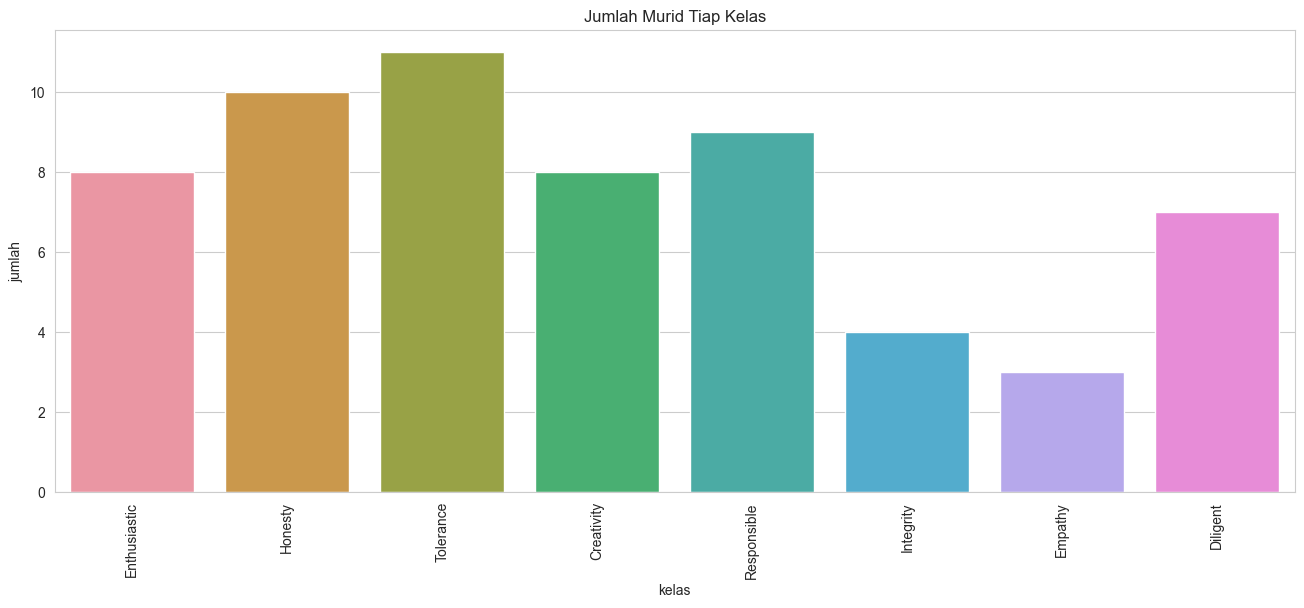

In [8]:
plt.figure(figsize=(16,6))
sns.countplot(df, x='class', order=order_list)
plt.title('Jumlah Murid Tiap Kelas')
plt.ylabel('jumlah')
plt.xlabel('kelas')
plt.xticks(rotation=90)
plt.show()

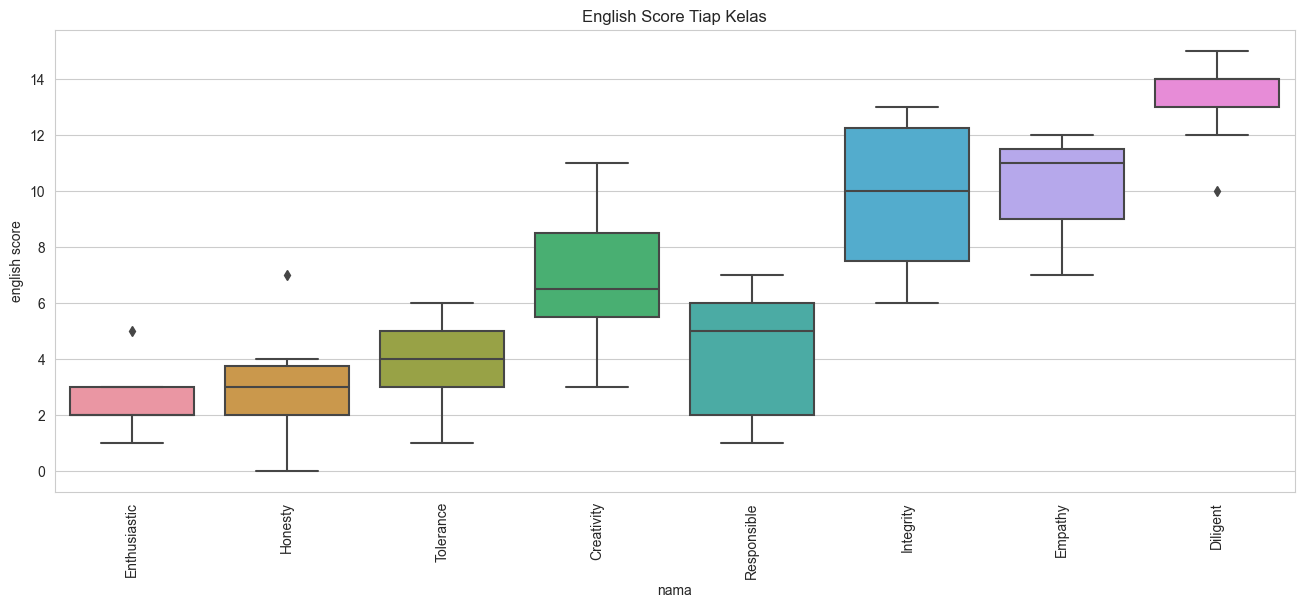

In [9]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='class', y='english_score', order=order_list)
plt.title('English Score Tiap Kelas')
plt.ylabel('english score')
plt.xlabel('nama')
plt.xticks(rotation=90)
plt.show()

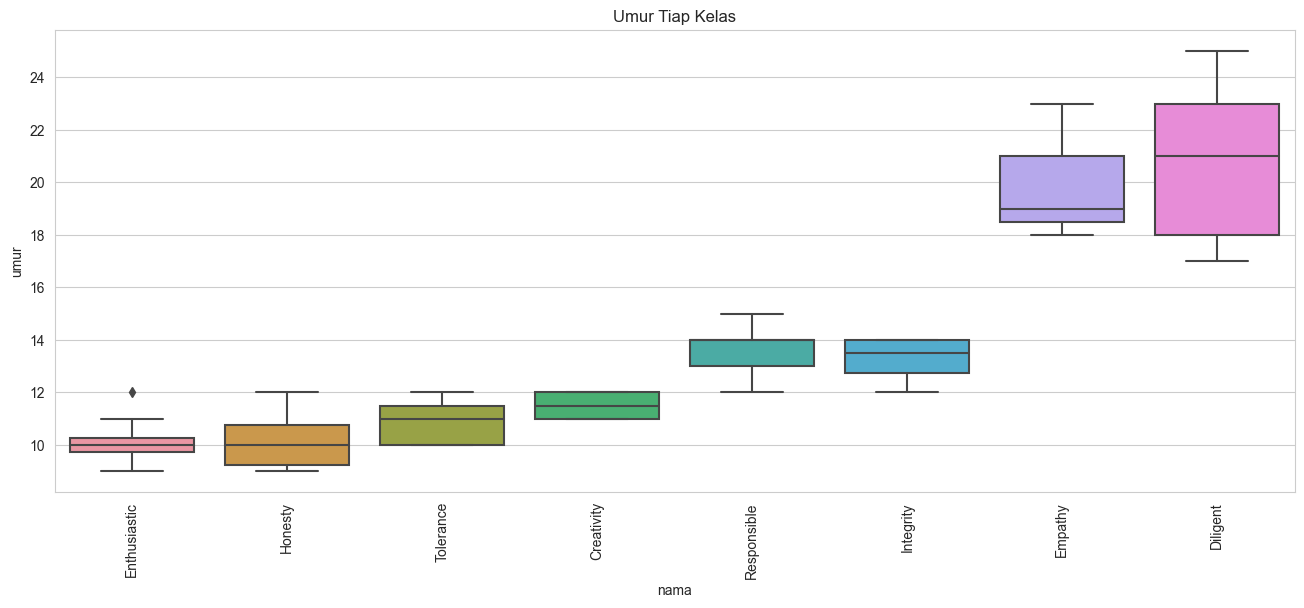

In [10]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='class', y='age', order=order_list)
plt.title('Umur Tiap Kelas')
plt.ylabel('umur')
plt.xlabel('nama')
plt.xticks(rotation=90)
plt.show()

C:\Users\yandiher\AppData\Local\Temp\ipykernel_1908\772119939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(3), annot=True)


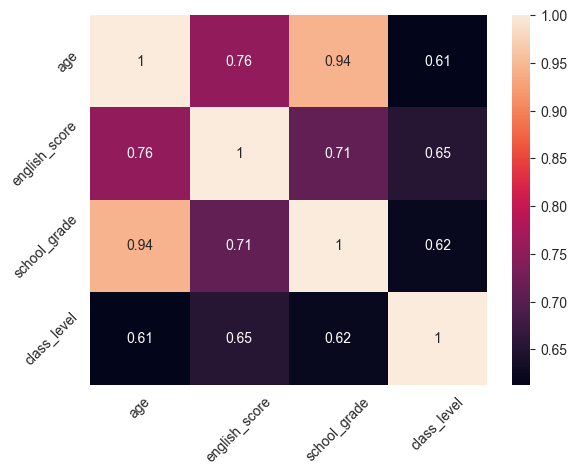

In [23]:
sns.heatmap(df.corr().round(3), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

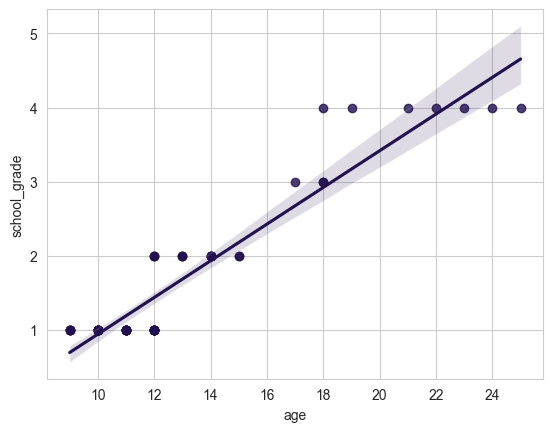

In [12]:
sns.regplot(data=df, x='age', y='school_grade', )
plt.show()

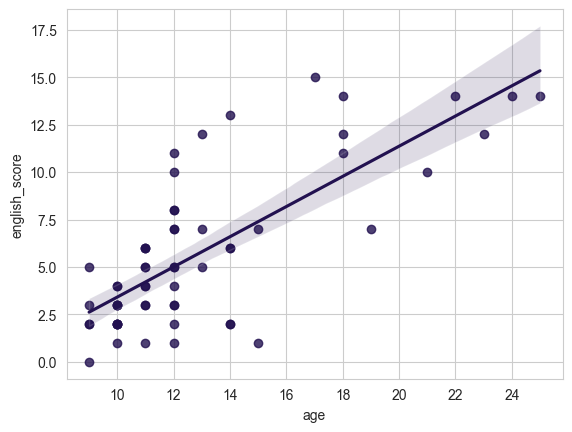

In [13]:
sns.regplot(data=df, x='age', y='english_score')
plt.show()

# Data Analysis

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

In [15]:
x = df[['age','english_score','school_grade']].values
# x = df[['age','english_score']].values
y = df['class_level'].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [17]:
x_variable = ['CONST', 'age', 'english_score', 'school_grade']
# x_variable = ['CONST', 'age', 'english_score']

In [18]:
x_train_constant = sm.add_constant(x_train)
train_model = sm.OLS(exog=x_train_constant, endog=y_train).fit()
print(train_model.summary(xname=x_variable))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.79e-05
Time:                        00:01:02   Log-Likelihood:                -92.630
No. Observations:                  48   AIC:                             193.3
Df Residuals:                      44   BIC:                             200.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CONST             1.5116      1.445      1.046

In [19]:
x_test_constant = sm.add_constant(x_test)
test_model = sm.OLS(exog=x_test_constant, endog=y_test).fit()
print(test_model.summary(xname=x_variable))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     14.01
Date:                Mon, 19 Jun 2023   Prob (F-statistic):            0.00150
Time:                        00:01:03   Log-Likelihood:                -14.428
No. Observations:                  12   AIC:                             36.86
Df Residuals:                       8   BIC:                             38.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CONST             1.9547      2.154      0.907

C:\Users\yandiher\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
x_constant = sm.add_constant(x)
model = sm.OLS(exog=x_constant, endog=y).fit()
print(model.summary(xname=x_variable))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     17.10
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           5.26e-08
Time:                        00:01:03   Log-Likelihood:                -111.95
No. Observations:                  60   AIC:                             231.9
Df Residuals:                      56   BIC:                             240.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CONST             1.6476      1.250      1.318

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.score(x_train,y_train).round(3)

0.426